# Kasner - with static mass

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, sin, cos, sinh, sqrt
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

Kasner eqn 31
10.1139/cjp-2017-1001

In [3]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = 2*M - syms[0]*M
#a = sqrt(2*M)*sin(w*syms[0])
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = (1 - (a / syms[1]))* (c ** 2)
list2d[0][1] = -1*sqrt(a/syms[1])*c
list2d[1][0] = -1*sqrt(a/syms[1])*c
list2d[1][1] = -1
list2d[2][2] = -1 * (syms[1] ** 2)
list2d[3][3] = -1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                            ____________                  ⎤
⎢ 2 ⎛    -M⋅t + 2⋅M⎞        ╱ -M⋅t + 2⋅M                   ⎥
⎢c ⋅⎜1 - ──────────⎟  -c⋅  ╱  ──────────    0        0     ⎥
⎢   ⎝        r     ⎠     ╲╱       r                        ⎥
⎢                                                          ⎥
⎢       ____________                                       ⎥
⎢      ╱ -M⋅t + 2⋅M                                        ⎥
⎢-c⋅  ╱  ──────────           -1            0        0     ⎥
⎢   ╲╱       r                                             ⎥
⎢                                                          ⎥
⎢                                            2             ⎥
⎢         0                    0           -r        0     ⎥
⎢                                                          ⎥
⎢                                                 2    2   ⎥
⎣         0                    0            0   -r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [4]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()

⎡      2                                                                      
⎢0.25⋅M ⋅c⋅(4.0⋅t - 8.0)         -1.0⋅M                                       
⎢───────────────────────         ───────                   0                  
⎢          ___________               2                                        
⎢    3    ╱ M⋅(2 - t)               r                                         
⎢   r ⋅  ╱  ─────────                                                         
⎢      ╲╱       r                                                             
⎢                                                                             
⎢        -1.0⋅M                  -1.0⋅M                                       
⎢        ───────          ──────────────────────           0                  
⎢            2                     _____________                              
⎢           r                2    ╱ -M⋅(t - 2)                                
⎢                         c⋅r ⋅  ╱  ───────────     

(t, r, theta, phi, M, c)


Text(0.5, 1.0, 'T_01')

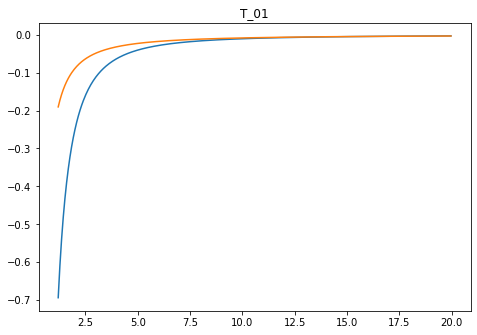

In [7]:
# ###Plot something
# IF mass is constant - nothing to plot, as we don't have a ricci tensor
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.2, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1)[0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1)[0][1]
z = 1/x**2*func(1.0,x,1, 1, 1, 1)[2][2] 
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")

